In [27]:
# Importing library
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator

# Import Data and Understanding

In [30]:
# Importing data
df_user_features = pd.read_csv('../../feature/user_features.csv')

In [31]:
df_user_features.head()

,user_id,recency,frequency_orders,frequency_items,monetary_total,monetary_avg,monetary_std,num_departments,num_aisles,num_unique_products,order_dow_min,order_dow_max,order_dow_mean,order_hour_min,order_hour_max,order_hour_mean,days_since_prior_mean,days_since_prior_min,days_since_prior_max,cluster
0,1,89,10,59,59,5.900000,0,7,12,18,1,4,2.644068,7,16,10.542373,20.259259,0.0,30.0,1
1,2,85,14,195,195,13.928571,0,13,33,102,1,5,2.005128,9,15,10.441026,15.967033,3.0,30.0,0
2,3,87,12,88,88,7.333333,0,9,16,33,0,3,1.011364,14,19,16.352273,11.487179,7.0,21.0,2
3,4,94,5,18,18,3.600000,0,9,14,17,4,6,4.722222,11,15,13.111111,15.357143,0.0,21.0,1
4,5,95,4,37,37,9.250000,0,9,16,23,0,3,1.621622,12,18,15.729730,14.500000,10.0,19.0,2


In [32]:
df_user_features.info()

<class 'pandas.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                206209 non-null  int64  
 1   recency                206209 non-null  int64  
 2   frequency_orders       206209 non-null  int64  
 3   frequency_items        206209 non-null  int64  
 4   monetary_total         206209 non-null  int64  
 5   monetary_avg           206209 non-null  float64
 6   monetary_std           206209 non-null  int64  
 7   num_departments        206209 non-null  int64  
 8   num_aisles             206209 non-null  int64  
 9   num_unique_products    206209 non-null  int64  
 10  order_dow_min          206209 non-null  int64  
 11  order_dow_max          206209 non-null  int64  
 12  order_dow_mean         206209 non-null  float64
 13  order_hour_min         206209 non-null  int64  
 14  order_hour_max         206209 non-null  int64  

In [33]:
df_user_features.describe()

,user_id,recency,frequency_orders,frequency_items,monetary_total,monetary_avg,monetary_std,num_departments,num_aisles,num_unique_products,order_dow_min,order_dow_max,order_dow_mean,order_hour_min,order_hour_max,order_hour_mean,days_since_prior_mean,days_since_prior_min,days_since_prior_max,cluster
count,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.0,206209.000000,206209.00000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,83.409633,15.590367,157.289396,157.289396,9.951586,0.0,10.827796,27.78370,64.536238,0.455756,5.305617,2.750055,8.107275,18.896202,13.546251,15.469670,6.472317,26.301582,1.048815
std,59527.555167,16.654774,16.654774,204.208233,204.208233,5.863570,0.0,3.791768,16.11153,56.592339,0.881022,1.146792,1.014136,3.672879,2.990795,2.218474,7.207436,7.578506,6.654544,0.979645
min,1.000000,0.000000,3.000000,3.000000,3.000000,1.000000,0.0,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51553.000000,80.000000,5.000000,39.000000,39.000000,5.740741,0.0,8.000000,15.00000,25.000000,0.000000,5.000000,2.113636,7.000000,17.000000,12.099099,9.553797,1.000000,25.000000,0.000000
50%,103105.000000,90.000000,9.000000,83.000000,83.000000,8.933333,0.0,11.000000,25.00000,48.000000,0.000000,6.000000,2.753425,8.000000,19.000000,13.521739,14.692308,4.000000,30.000000,1.000000
75%,154657.000000,94.000000,19.000000,188.000000,188.000000,13.000000,0.0,14.000000,38.00000,86.000000,1.000000,6.000000,3.370748,10.000000,21.000000,14.971429,20.724409,8.000000,30.000000,2.000000
max,206209.000000,96.000000,99.000000,3725.000000,3725.000000,70.250000,0.0,21.000000,102.00000,726.000000,6.000000,6.000000,6.000000,23.000000,23.000000,23.000000,30.000000,30.000000,30.000000,3.000000


# Initialize Model

In [34]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_user_features.drop(columns=['user_id', 'cluster']))

In [35]:
X_scaled

array([[ 0.33566236, -0.33566236, -0.48132062, ...,  0.66453607,
        -0.85403804,  0.55577461],
       [ 0.0954904 , -0.0954904 ,  0.18466785, ...,  0.06900713,
        -0.4581807 ,  0.55577461],
       [ 0.21557638, -0.21557638, -0.33930838, ..., -0.55255432,
         0.06962907, -0.79668798],
       ...,
       [-0.02459559,  0.02459559,  0.32178313, ..., -0.08189794,
        -0.72208559,  0.55577461],
       [-2.00601431,  2.00601431,  2.54500936, ..., -1.11379192,
        -0.85403804, -0.9469616 ],
       [ 0.15553339, -0.15553339, -0.13853244, ...,  0.66683964,
        -0.4581807 ,  0.55577461]], shape=(206209, 18))

In [36]:
# หา k ด้วย Elbow Method
inertia = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

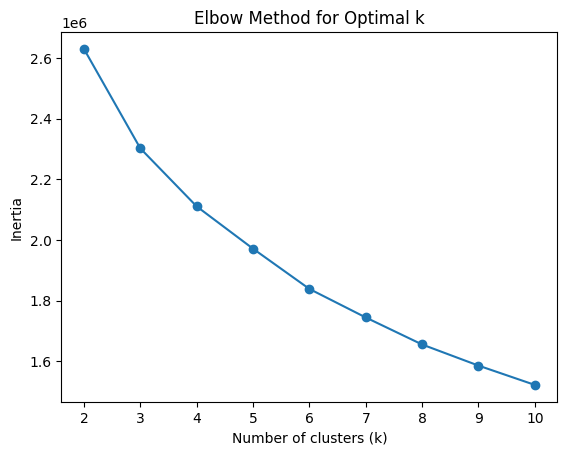

In [37]:
# พลอตกราฟเพื่อดู Elbow Method
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [38]:
# หา k ด้วย KneeLocator
ks = range(2, 11)
knee = KneeLocator(ks, inertia, curve='convex', direction='decreasing')

print("Optimal k:", knee.knee)

Optimal k: 5


In [39]:
# หา k ด้วย Silhouette Score โดยใช้ MiniBatchKMeans
silhouette_scores = []

for k in range(2, 11):
    # 1. ใช้ n_init='auto' ตามมาตรฐานเวอร์ชันใหม่
    model = MiniBatchKMeans(n_clusters=k, random_state=42, n_init='auto', batch_size=2048)
    model.fit(X_scaled)
    
    # 2. หัวใจสำคัญ: ใส่ sample_size เพื่อไม่ให้เครื่องค้าง
    # เลือกสุ่มมาสัก 10,000 ตัวอย่าง (หรือตามความเหมาะสมของ RAM)
    score = silhouette_score(X_scaled, model.labels_, sample_size=10000, random_state=42)
    
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score: {score:.4f}")

k=2, Silhouette Score: 0.2246
k=3, Silhouette Score: 0.1631
k=4, Silhouette Score: 0.1634
k=5, Silhouette Score: 0.1613
k=6, Silhouette Score: 0.1439
k=7, Silhouette Score: 0.1289
k=8, Silhouette Score: 0.1208
k=9, Silhouette Score: 0.1188
k=10, Silhouette Score: 0.1246


In [45]:
# สร้าง PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

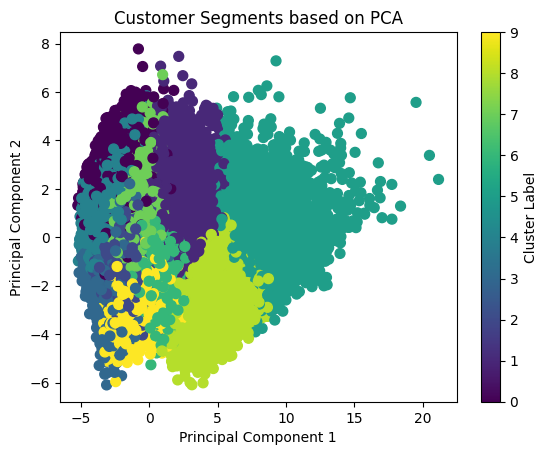

In [46]:
# พลอตกราฟเพื่อดูการกระจายของคลัสเตอร์ในมิติของ PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=model.labels_, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments based on PCA')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
df_user_features['cluster'] = model.labels_

NameError: name 'df' is not defined